  ...
    to  
  ['...']
Train for 250 steps, validate on 2000 samples
Epoch 1/10
250/250 [==============================] - 128s 512ms/step - loss: 1.4103 - accuracy: 0.5071 - val_loss: 1.9732 - val_accuracy: 0.3035
Epoch 2/10
250/250 [==============================] - 122s 489ms/step - loss: 0.9525 - accuracy: 0.6655 - val_loss: 2.0548 - val_accuracy: 0.2770
Epoch 3/10
250/250 [==============================] - 129s 515ms/step - loss: 0.8357 - accuracy: 0.7011 - val_loss: 2.3917 - val_accuracy: 0.3125
Epoch 4/10
250/250 [==============================] - 125s 502ms/step - loss: 0.7528 - accuracy: 0.7315 - val_loss: 2.4439 - val_accuracy: 0.3200
Epoch 5/10
250/250 [==============================] - 123s 494ms/step - loss: 0.6599 - accuracy: 0.7614 - val_loss: 2.3711 - val_accuracy: 0.3675
Epoch 6/10
250/250 [==============================] - 127s 507ms/step - loss: 0.6277 - accuracy: 0.7756 - val_loss: 2.4364 - val_accuracy: 0.3485
Epoch 7/10
250/250 [==============================] -

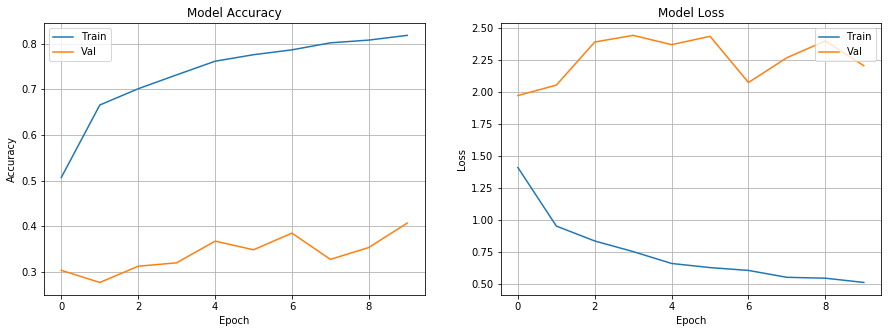

In [1]:
import numpy as np
import tensorflow as tf

import common

x_train, y_train = common.load_train_data()
x_test, y_test = common.load_test_data()

train_data, train_labels = x_train, tf.keras.utils.to_categorical(y_train)
test_data, test_labels = x_test, tf.keras.utils.to_categorical(y_test)

np.random.seed(common.SEED_VALUE)
perm = np.random.permutation(len(x_train))
train_data, train_labels = train_data[perm], train_labels[perm]

train_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

pre_trained_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_tensor=tf.keras.layers.Input(shape=(224, 224, 3))
)

for layer in pre_trained_model.layers:
    layer.trainable = False

new_top = pre_trained_model.output
new_top = tf.keras.layers.AveragePooling2D(pool_size=(7, 7))(new_top)
new_top = tf.keras.layers.Flatten()(new_top)
new_top = tf.keras.layers.Dense(512, activation='relu')(new_top)
new_top = tf.keras.layers.Dropout(0.5)(new_top)
new_top = tf.keras.layers.Dense(len(train_labels[0]), activation='softmax')(new_top)

model = tf.keras.models.Model(inputs=pre_trained_model.input, outputs=new_top)
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

x = round(len(train_data) * .8)

history = model.fit(
    train_augmentation.flow(
        train_data[0:x],
        train_labels[0:x],
    ),
    epochs=10,
    validation_data=(
        train_data[x:],
        train_labels[x:]
    )
)

model.save('models/ResNet50')


In [ ]:
common.plot_acc_loss(history)

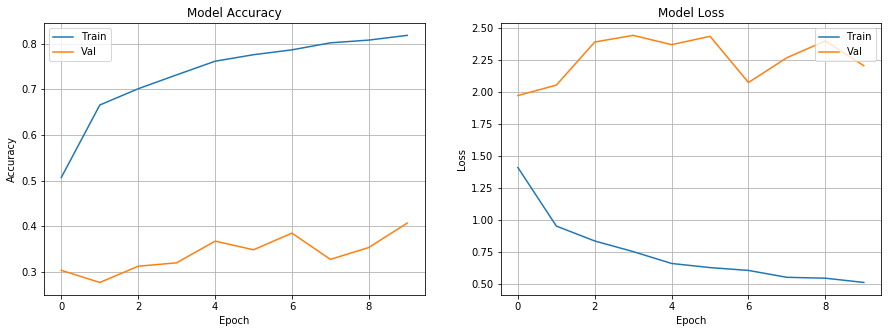

In [3]:
common.plot_acc_loss(history)